In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [90]:
# i_list = np.linspace(0,0.5,20)
# for i in i_list:
#     os.system(f"cd fp && cargo run {i} ../taxis_sens/{i}")

In [155]:
dir_list = os.listdir("taxis_sens")

# unif =[]
# with open("taxis_sens/"+dir_list[0]+"/1500.csv") as f:
#     reader = csv.reader(f)
#     for v in reader:
#         unif.append([float(a) for a in v])
# unif = unif[0]
unif = np.linspace(0,1,500)

clumped = []
with open("taxis_sens/"+dir_list[4]+"/1500.csv") as f:
    reader = csv.reader(f)
    for v in reader:
        clumped.append([float(a) for a in v])
clump = clumped[0]
rand = np.random.rand(500)

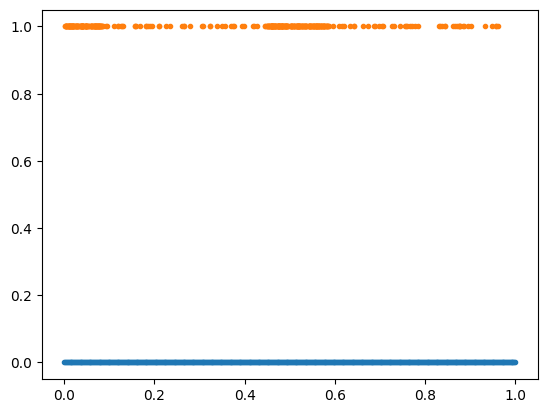

In [156]:
plt.scatter(unif, np.zeros_like(unif), marker=".")
plt.scatter(clump, np.zeros_like(clump)+1, marker=".")

In [211]:
def nn(x):
    out = []
    for i, p in enumerate(x):
        record = np.inf
        for j, q in enumerate(x):
            if i != j:
               record = min(record, abs(p-q)) 
        out.append(record)
    return out 

def count_below(x,d):
    total = 0
    for v in x:
        if v < d:
            total += 1
    return total

def k_count(vs, t):
    total = 0
    for i,p in enumerate(vs):
        for j,q in enumerate(vs):
            if i != j and abs(p-q) < t:
                total+=1
    return total


def K(x,ts):
    out = []
    for t in ts:
        val = k_count(x,t) / len(x)**2
        out.append(val)
    return out

def avg_k_dist(vs):
    xs = np.linspace(0,1,100)
    ks = K(vs, xs)
    expected_k = xs / len(vs)
    dists = ks - expected_k
    return np.trapz(dists,xs)

def k_conf(vs,c, xs=np.linspace(0,1,100)):
    l = len(vs)
    rands = np.array([np.random.rand(l) for _ in range(c)])
    ks = [K(v,xs) for v in rands]
    ks_T = np.transpose(ks)
    upper = [max(k) for k in ks_T]
    lower = [min(k) for k in ks_T]
    return [upper,lower,xs]

def expectation_distance(vs, xs = np.linspace(0,1,100):
    ks = K(vs,xs)
    expected_k = 2*xs - xs**2

    metrics = []
    for i, k in enumerate(ks[1:]):
        c = k/expected_k[i+1]
        if c > 0:
            metric = np.log2(c)
        else:
            metric = 0
        metrics.append(metric)
    return np.average(metrics), xs, ks

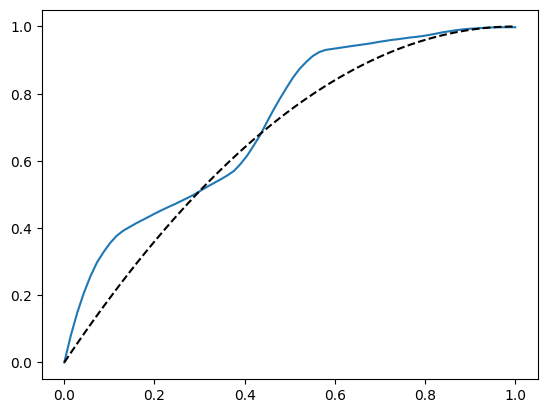

In [209]:
met, xs, clump_K = expectation_distance(clump)
plt.plot(ds,)
plt.plot(ds,2*ds-ds**2, color="black", linestyle="dashed")


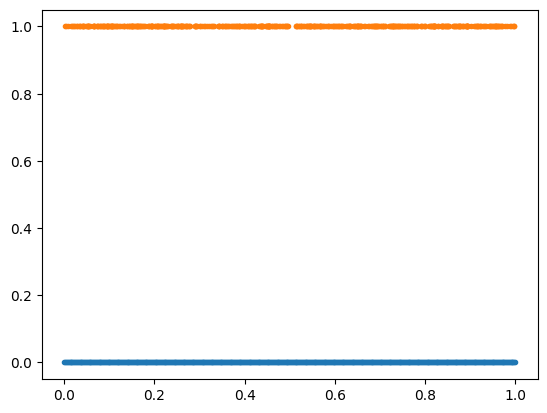

In [205]:
plt.scatter(unif,np.zeros_like(unif), marker=".")
plt.scatter(rand,np.zeros_like(rand)+1, marker=".")

In [93]:
data = []
for dir_name in dir_list:
    out = []
    with open("taxis_sens/"+dir_name+"/1500.csv") as f:
        reader = csv.reader(f)
        for v in reader:
            out.append([float(a) for a in v])
    
    data.append(out[0])

902

In [144]:
e_dists = []
for run in data:
    e_dists.append(expectation_distance(run))

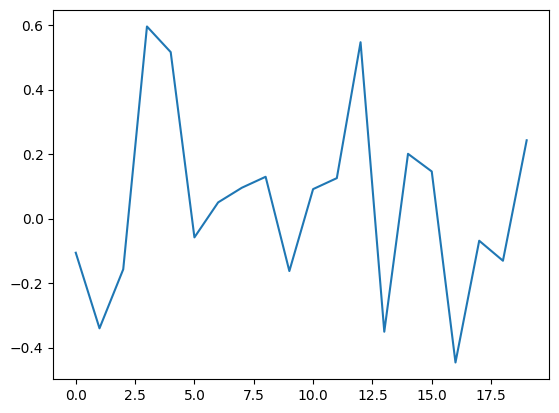

In [145]:
plt.plot(e_dists)